### CS/ECE/ISyE 524 &mdash; Introduction to Optimization &mdash; Fall 2018 ###
### University of Wisconsin-Madison ###
# Traveling Tourist Problem: Universal Orlando Florida Theme Parks#

#### Hayden Pilsner (hpilsner@wisc.edu 9074728099)
#### Sahil Verma (sverma23@wisc.edu, 9075936238)
#### Rakshith Padmanabha (rpadmanabha@wisc.edu, 9075969643)

### Table of Contents

1. [Introduction](#1.-Introduction)
1. [Mathematical Model](#2.-Mathematical-model)
1. [Solution](#3.-Solution)
1. [Results and Discussion](#4.-Results-and-discussion)
1. [Conclusion](#5.-Conclusion)

## 1. Introduction ##

Despite the amazing time everyone has at theme parks, the waiting times are often the most annoying part of the trip. To fix this problem, we decided to come up with a simple wait-time optimizer, to minimize time spent in lines, and spend more time enjoying the park!

When Hayden went to Universal Park studios at Orlando,FL over Thanksgiving, he was disappointed with the amount of time he spent in lines rather than enjoying the rides. When the day was over he had ridden all the rides. This gave him the Eureka moment that it definitely is possible to enjoy all rides, even though a majority of his time was spent in rides. As such, when he returned from his trip, and he told us his interesting finding, we all wondered whether it was possible to travel to all the rides by optimizing which ride you visit based on the wait time. Hence, we decided to explore this question as our CS 524 final project.

We decided to solve this problem by modeling our question in the form of popular but challenging problem called the Traveling Salesman Problem. It essentially asks the question "Given a list of cities and the distances between each pair of cities, what is the shortest possible route that visits each city and returns to the origin city?" ([cite](https://en.wikipedia.org/wiki/Travelling_salesman_problem)). For our model, we aggreagated problem data from [Touring Plans website](https://touringplans.com/universal-studios-florida/wait-times) and Google Maps for the wait time for each ride for specific day and for walk time between the rides in the theme park respectively. The goal of our model is to the best path that the tourist should take inorder to efficiently minimize wait time and walk time by experiencing all a selection of rides in the theme park. For this problem, we chose six rides from two separate parks (a selection of rides that are most defintely selected from a group member's bias but have been empirically validated to obviously be the best).

In our report, we have explained three models, which are of incremental increase in complexity from the previous model, with the third model being able to successfully meet all the requirements of the our problem and provide an efficient solution. The first model we developed returns the solution by minimizing the wait time for each ride and does not consider walk time. The second model we developed returns the solution by minimizing the walk time between the rides. The result of the second model is similar to achieving the shortest path for all the rides inside the theme park. The third model is a merger of the first and the second model. The third model takes into account both the wait time for each ride and walk time between rides and returns the order in which a tourist should go on the rides in the theme park to minimize the total time spent in the theme park.

We found interesting and conclusive results by testing our model with data from Universal Studios Florida. We can easily use this model for other theme parks as well to yield the same efficient result. We can use our model with little to no change in other time constrained circumstances like moderate traffic flow by minimizing wait time at intersections, supply chain of goods and services, to name a few.

## 2. Mathematical model ##

### Minimizing Wait Time: ###

After some research on Time Dependent Traveling Salesman, we decided to modify a model formulated by Furini et al. ([Furini, Fabio. “The Time Dependent Traveling Salesman Planning Problem in Controlled Airspace.” (2015)](http://www.optimization-online.org/DB_FILE/2015/06/4971.pdf)) to find the optimal path. The extra constraint that we added is that of the wait-times of rides itself, with the objective to minimize the amount of time spent in lines. For this problem, we chose to take the data of Universal Park studios. The [wait time data](https://touringplans.com/universal-studios-florida/wait-times) that we used is based on a predicitve data set, and hence the results can be actually applicable in real life, although dependent on the accuracy of the predictive data.

Since we wanted to create an extension to Traveling Salesman, we wanted to start with how we would minimize wait time and then apply it to traveling salesman in a later model. This first model minimizes the time someone waits in line at the park, but it doesn't necessarily force these rides to happen one after another. This lets the visitor spread their rides throughout the day, visiting attractions only at their lowest wait times. The important thing we tried to capture in this model was constrained with a temporal ordering to visiting attractions and accounted for the time we have to wait in line.

The two time decision matrices are $x$ and $y$ which denote the departure and arrival times of the rides respectively. The superscript, $t$ in both of these variables is not an exponent, and instead denotes the time dimension of the variables.

$$\begin{aligned}
    x_{ij}^{t} &= \begin{cases}
    1, & \text{if departing from ride $i$ to ride $j$ at time $t$}.\\
    0, & \text{otherwise}.
  \end{cases}
\\ \\
    y_{i}^{t} &= \begin{cases}
    1, & \text{if arriving at ride $i$ at time $t$}.\\
    0, & \text{otherwise}.
  \end{cases}
\end{aligned}$$

These decision matrices are used in our temporal constraints so that our model can make sense of time, reasonably. Our constraints are modified from the Furini et al. paper. We constrain a requirement for an arrival and departure from every ride in the first four constraints. The fifth constraint puts a chronological order on our arrival and departure time for each ride. We essentially constrain the model to not depart from a ride before it has arrived, because that is impossible practically. The sixth constraint is a set of conditional constraints that enforce wait times. We put a lower limit on the difference between the departure and arrival at a ride, conditioned upon if we arrive at a ride at time t. The $\gamma$ coefficient on the sum in the sixth constraint is just a way to convert the departure and arrival times to minutes. This is a MILP and is polynomial in the number of constraints. There are no constraints that set an upper limit on the departure from one ride and the arrival at the next. We were running into issues with resolving this and getting feasible solutions, so we tried to simplify it in the third model.


$$\begin{aligned}
  \underset{x, y}{\text{minimize}}\qquad& \sum_{i\in A}\left(\sum_{t = 1}^{T} \sum_{j\in A} tx_{ij}^{t} - \sum_{t = 1}^{T} ty_{i}^{t} \right)\\
    \text{subject to:}\qquad& \sum_{t = 1}^{T} \sum_{j\in A} x_{ij}^{t} = 1 && \forall i \in A\\
    & \sum_{t = 1}^{T} \sum_{i \in A} x_{ij}^{t} = 1 && \forall j \in A \\
    & \sum_{t = 1}^{T} y_{i}^{t} = 1 && \forall i \in A \\
    & \sum_{i \in A} y_{i}^{t} \le 1 && \forall t \in \{ 1, \dots , T \}\\
    & \sum_{j\in A} x_{ij}^{t} \le \sum_{k = 0}^{t} y_{i}^{k} && \forall i \in A, \quad \forall t \in \{ 1, \dots , T \}\\
    & y_{i}^{t} w_{i}^{t} \le \gamma \sum_{k = t}^{T} \sum_{j\in A} kx_{ij}^{k} - ty_{i}^{t} && \forall i \in A, \quad \forall t \in \{ 1, \dots , T \} \\
    & x_{ij}^{t} \in \{0, 1\} && \forall i,j \in A, \quad \forall t \in \{ 1, \dots , T \} \\
    & y_{i}^{t} \in \{0, 1\} && \forall i \in A, \quad \forall t \in \{ 1, \dots , T \}
    \end{aligned}$$

### Minimizing Walk Time: ###

This next model is a known formulation to solve the Traveling Salesman through a MIP. It is a model that eliminates multiple subtours using Miller-Tucker-Zemlin formulation through an exact number of constraints which is better than other TSP's which have exponential constraints. We chose this formulation because adding our temporal constraints in the time formulation would make the problem just as difficult if already had to deal with an exponential number of constraints. This model is used to solve our symmetric walk time TSP so we can compare the results of walk time and how they change when wait time is considered. The symmetric walk time matrix is represented by $c$. This matrix is constant throughout time because its only dependent on distance.
    
$$\begin{aligned}
  \underset{x, u}{\text{minimize}}\qquad& \sum_{i\in A} \sum_{j \in A} c_{ij}x_{ij} \\
    \text{subject to:}\qquad& \sum_{i\in A} x_{ij} = 1 && \forall j \in A \\
    & \sum_{j \in A} x_{ij} = 1 && \forall i \in A \\
    & x_{ii} = 0 && \forall i \in A\\
    & u_i - u_j + Rx_{ij} \le R - 1 && \forall i,j \in A \\
    & x_{ij} \in \{0, 1\} && \forall i,j \in A \\
\end{aligned}$$

### Minimizing Walk and Wait Time: ###

This final model includes the temporal extension to TSP for a dynamic cost and temporally constrained Miller-Tucker-Zemlin formulation. We use similar variables to our first model which just minimized wait time. The variable $a$ is a decision matrix where $a_{it}$ is 1 if the visitor arrives at attraction $i$ at time $t$. This arrival decision matrix is equivalent to $y$ in the first model. We decided to get rid of the decision matrix for departures because we though it was unnecessary and obfuscated the constraints. We also improved our solution by not considering fifteen minute time slots, and rather express our time in terms of minutes. Although the number of time slots is significantly greater, we have eliminated the factor that the number of constraints is dependent on the number of time slots, and rather just dependent on the number of rides.

$$\begin{aligned}
    x_{ij} &= \begin{cases}
    1, & \text{if departing from ride $i$ to ride $j$}.\\
    0, & \text{otherwise}.
  \end{cases}
\\ \\
    a_{it} &= \begin{cases}
    1, & \text{if arriving at ride $i$ at time $t$}.\\
    0, & \text{otherwise}.
  \end{cases}
\end{aligned}$$

The constant variables $T$ and $R$ denote the number of minutes in the day and the number of rides, respectively. To allow grace periods between visiting rides, we include a constant, $\beta$ which is the fixed grace period between visiting rides.

The choice of some constant variables can severelly determine the feasibility and performance of the model. The number of minute slots throughout the day, $T$ can be experimented with until the solution becomes feasible. Making $T$ too small will cause the model to fail to fit all rides into $T$ minutes throughout the day. A large $\beta$ can also create this infeasability as it can spread the rides too much throughout the day so not all can be achieved. The model could be improved to become selective in the attractions it visits that maximizes some quantity such as fun!

The new temporal variables and constraints enforce a chronology on the arrival times given some TSP order. The constraint below is what gives this order to the arrival times while also spreading the arrival times to accomodate for the wait times and grace period.

$$\begin{aligned}
    & (1 - x_{i,1})\sum_{t = 1}^{T}a_{it}(t + \beta + w_{it}) + \sum_{j=2}^{R}x_{ij}c_{ij} = \sum_{t=1}^{T}\sum_{j=2}^{R}ta_{jt}x_{ij} && \forall i \in A \\
\end{aligned}$$

The left hand side of this equality is the sum of the time we arrive at a ride $i$, the wait time $(w_{it})$ at ride $i$ at time $t$ and the grace period. In other words, it is the time we can leave ride $i$. We constrain this quantity to be equal to the time we arrive at the next ride $j$.

This TSP is anchored to begin at the entrance of the park since it is where all visitors must enter the park at the beginning of their visit. This is simply constrained by setting $a_{1,1}$ to 1. You'll notice in the previous constraint that we had to make an exception for the arrival time between the last ride and the return to the entrance of the park. To make this constraint conditional on the final ride, we include the decision to add the constraint, $(1 - x_{i,1})$. We also don't let the sum include $j = 1$ because when $j$ is one, we are considering the decision variable $x_{ij}$ where the final ride is going to the entrance. The time that we can visit the final ride, must not be zero, so we don't include $j = 1$ in the sum.

In our objective quantity, we include the following. This is the sum of the wait times. To give an option on objective of minimization, we introduce two objective quantity weight parameters $(\lambda_{1}, \lambda_{2})$. This allows us to weight our decision to minimize wait time more than walk time or vice versa depending on the desire of the visitor.

The model we are left with is a formulation of a MIP. We also have a direct number of constraints, polynomial in the number of rides and minutes throughout the visit.

$$\begin{aligned}
  \underset{x, a, u}{\text{minimize}}\qquad& \lambda_{1}\sum_{i\in A} \sum_{j \in A} c_{ij}x_{ij} + \lambda_{2}\sum_{i\in A}\sum_{t = 1}^{T} a_{it}w_{it} \\
    \text{subject to:}\qquad& \sum_{i\in A} x_{ij} = 1 && \forall j \in A \\
    & \sum_{j \in A} x_{ij} = 1 && \forall i \in A \\
    & x_{ii} = 0 && \forall i \in A\\
    & \sum_{t = 1}^{T} a_{it} = 1 && \forall i \in A \\
    & a_{1,1} = 1 \\
    & (1 - x_{i,1})\sum_{t = 1}^{T}a_{it}(t + \beta + w_{it}) + \sum_{j=2}^{R}x_{ij}c_{ij} = \sum_{t=1}^{T}\sum_{j=2}^{R}ta_{jt}x_{ij} && \forall i \in A \\
    & u_i - u_j + Rx_{ij} \le R - 1 && \forall i,j \in A \\
    & x_{ij} \in \{0, 1\} && \forall i,j \in A \\
    & a_{it} \in \{0, 1\} && \forall i \in A \quad t \in {1,...,T}
\end{aligned}$$

## 3. Solutions ##

### Minimizing Wait Time (Prototype): ###

The first segment to our solution is the implementation of our first model, which minimizes wait time. We are given a solution that essentially tells us to arrive at the ride at the time when its wait is lowest. This solution is obviously trivial and could be solved in a faster algorithm that just determines the min wait time for each ride. The fifteen minute time slots also make us waste time during the day since most wait times are less than fifteen minutes and the rest of the slot is wasted. Nonetheless, this is important for proving how are model handles time and gives a foundation for us to use the arrival and departure decision variables. We also implemented the constraint that enforces wait times, so the solution isn't entirely trivial in that it has to select minimum ride times carefully that they don't overlap with eachother's wait times.

In [17]:
using JuMP, Gurobi, NamedArrays
s = 40    # number of time s
z = 15    # interval of time s
α = 15
# import wait times
raw_wait = readcsv("studios_wait.csv")
(u,v) = size(raw_wait)

n_waitTimes = 2:v      # columns containing waitTimes
n_rides = 2:u          # rows containing rides names

waitTimes = raw_wait[1,n_waitTimes][:]   
rides = raw_wait[n_rides,1][:]           

w = NamedArray( raw_wait[n_rides,n_waitTimes], (rides,waitTimes), ("Rides","Wait Times") );
r = u - 1    # number of rides

m = Model(solver=GurobiSolver(OutputFlag=0))

@variable(m, x[1:r, 1:r, 1:s], Bin)    # departures from i to j at time t
@variable(m, y[1:r, 1:s], Bin)    # arrivals at i at time t

@constraint(m, c1[i in 1:r], sum(sum(x[i,j,t] for j in 1:r) for t in 1:s) == 1)    # can only leave ride once
@constraint(m, c2[i in 1:r], sum(sum(x[j,i,t] for j in 1:r) for t in 1:s) == 1)    # can only come from one ride
@constraint(m, c3[i in 1:r], sum(y[i,t] for t in 1:s) == 1)    # ride each ride once and only once
@constraint(m, c4[t in 1:s], sum(y[i,t] for i in 1:r) <= 1)   # can only arrive at one ride at one time
# you cannot leave i before you arrive at i
@constraint(m, c5[i in 1:r, t in 1:s], sum(x[i,j,t] for j in 1:r) <= sum(y[i,k] for k in 1:t))
# difference between departure and arrival time must be at least the wait time at i, if arriving at i at time t
@constraint(m, c6[i in 1:r, t in 1:s], z*(sum(sum(k*x[i,j,k] for j in 1:r) for k in t:s) - t*y[i,t]) >= y[i,t] * w[i,t])

# wait time
@expression(m, wait, sum(sum(sum(z*t*x[i,j,t] for j in 1:r) for t in 1:s) - sum(z*t*y[i,t] for t in 1:s) for i in 1:r))
@objective(m, Min, wait)    # minimize wait time

solve(m)
println("Min wait time: ", getobjectivevalue(m))
sched_data = Array{String}(r, 2)
sched_headers = ["Arrival Time", "Wait (min)"]

opty = getvalue(y)
optx = getvalue(x)
order = 1

ride_order = copy(rides)
for i in 1:s
    for j in 1:r
        if (opty[j,i] == 1.0)
            ride_order[order] = rides[j]
            sched_data[order,1] = waitTimes[i]
            sched_data[order,2] = string(w[j,i])
            order += 1
        end
    end
end

schedule = NamedArray( sched_data[1:r,1:2], (ride_order, sched_headers), ("Rides","") );
println(schedule)

Academic license - for non-commercial use only
Min wait time: 90.0
7×2 Named Array{String,2}
                            Rides ╲  │ Arrival Time    Wait (min)
─────────────────────────────────────┼───────────────────────────
"Fast & Furious - Supercharged"      │    "9:00 AM"          "12"
"Harry Potter Escape from Gringotts" │    "9:15 AM"           "6"
"Transformers: The Ride 3D"          │   "11:00 AM"           "4"
"Shrek 4-D"                          │   "12:15 PM"          "11"
"The Simpsons Ride"                  │    "5:00 PM"          "15"
"MEN IN BLACK Alien Attack"          │    "6:30 PM"          "10"
"Entrance"                           │    "6:45 PM"           "0"


As we can see, the optimal wait time schedule is indeed spread throughout the day. Also, since we force each ride time into the fifteen minute slots, the objective must also consider these slots. The actual wait time is 52 minutes, but the slots cause us to waste another 38 minutes. This will be improved in the final solution.

### Helper Functions: ###

Since we get our data in 15 minute intervals, we forced our previous solution to choose time slots to arrive at rides. The import functions below will improve our solution by stretching the data into minute slots so the units of the data matchup with the size of the slots.

In [2]:
using NamedArrays
# helper functions
function print_schedule(solution, rides, c=[], w=[], s_hour=0, s_minute=0)
    x = solution[1]
    r = length(rides)
    start = 1
    subtour = [start]
    while true
        j = subtour[end]
        for k in 1:r
            if round(x[j,k], 1) == 1
                push!(subtour,k)
                break
            end
        end
        if subtour[end] == start
            break
        end
    end
    ride_order = []
    if (length(solution) == 5) # shortest walk and wait solution
        a = solution[2]
        schedule = Array{Any}(r+1,3)
        sched_headers = ["Arrival", "Walk", "Wait"]
        for i in 1:r
            # calculate time
            curr = subtour[i]
            minute_arrive = trunc(Int, round(sum(t*a[curr, t] for t in 1:length(a[i,:])), 1))
            minute_off = minute_arrive % 60
            hour_off = div(minute_arrive, 60)
            minute = s_minute + minute_off
            minute = (minute < 10) ? string("0", minute) : string(minute)
            hour = s_hour + hour_off
            (hour < 10) ? string("0", hour) : string(hour)
            schedule[i,1] = string(hour, ":", minute)
            schedule[i,2] = c[i,subtour[(i+1)]] # total wait time
            schedule[i,3] = w[i,minute_arrive]
            push!(ride_order, rides[curr])
        end
        push!(ride_order, "Total")
        schedule[r+1, 1] = "-" # total walk time
        schedule[r+1, 2] = solution[3] # total walk time
        schedule[r+1, 3] = solution[4] # total wait time
        println(NamedArray( schedule[1:r+1,1:3], (ride_order, sched_headers), ("Rides","") ))
    end
    if (length(solution) == 1)
        println("Min walk time order:", )
        for i in 1:r
            println(i, ". ", rides[subtour[i]])
        end
    end
end

function import_walk(filename)        # import walk times
    raw_walk = readcsv(filename)
    r = size(raw_walk)[1] - 1 # number of rides
    return raw_walk[2:r+1, 2:r+1]
end

function import_wait(filename, interval_len)    # import wait times
    raw_wait = readcsv(filename)
    r = length(raw_wait[:,1]) - 1
    slots = size(raw_wait[1, :])[1] - 1
    w = Matrix(0,slots*interval_len)
    raw_wait = raw_wait[2:r+1,2:slots+1]
    for i in 1:r
        w_row = []
        for j in 1:slots
            for k in 1:interval_len
                push!(w_row, raw_wait[i,j])
            end
        end
        w = [w ; transpose(w_row)]
    end
    return w
end

import_wait (generic function with 1 method)

### Minimizing Walk Time (TSP): ###
This function provides a solution to normal TSP with the symmetric walk distance matrix. We will see in the results how this solution just makes a circle around the bodies of water in both of the parks. The solution has a polynomial number of constraints in the number of rides, but TSP is still an NP-Hard problem so a solution is not polynomial in the number of rides. The solution returns the decision variable x, which determines the order of the rides. This solution is used to compare our results in this model to the results we get when considering wait times.

In [3]:
using JuMP, Gurobi

function shortest_walk(c)
    r = length(c[1,:])    # number of rides
    
    m = Model(solver=GurobiSolver(OutputFlag=0))
    @variable(m, x[1:r, 1:r], Bin)                                      # decision matrix going from ride i to j
    # TSP constraints
    @constraint(m, c1[j in 1:r], sum( x[i,j] for i in 1:r ) == 1)       # can only go to one other ride
    @constraint(m, c2[i in 1:r], sum( x[i,j] for j in 1:r ) == 1)       # can only come from one other ride
    @constraint(m, c3[i in 1:r], x[i,i] == 0 )                          # cannot go to same ride

    # Miller-Tucker-Zemlin variables and constraints to eliminate multiple subtours
    @variable(m, u[1:r])
    @constraint(m, c4[i in 1:r, j in 2:r], u[i] - u[j] + r*x[i,j] <= r-1 )

    @expression(m, walk, sum(x[i,j]*c[i,j] for i in 1:r, j in 1:r))
    @objective(m, Min, walk)   # minimize total cost

    solve(m)
    println("Min walk time: ", getobjectivevalue(m), " min")
    return [getvalue(x)]
end

shortest_walk (generic function with 1 method)

### Minimizing Walk and Wait Time (TDTSP): ###

This function provides a way to solve a Time Dependent Traveling Salesman Problem given a set of symmetric, constant walk times between rides and a matrix of wait times at each ride at each minute throughout the day. It also takes two objective quantity weight parameters to weight the urgency to minimize walk or wait times. The T parameter is the number of minute time slots to solve the problem over. The $\beta$ parameter determines the grace period between the rides. The feasibility of the solution is dependent on $T$ and $\beta$. Someone who is trying to obtain a solution for more rides or a longer grace period should start with small values and iteratively test the model until it becomes feasible. Starting with a large $T$ parameter can make the problem more difficult to solve when it doesn't have to occupy a large amount of time. For instance, if we solved the problem with a $T$ equivalent to the number of minutes that the park is open for the whole day, and we only need to go on six rides, we should start with a smaller $T$ because it could take a long time to solve. This solution could be improved to consider different periods throughout the day to test the solution. As of now it only starts from when the park opens, but many people likely don't show up at opening. Regardless, there is still large variation and volatility in wait times at the beginning of the day so the solution is non-trivial.

In [4]:
using JuMP, Gurobi

# walk_λ    the walk objective quantity weight
# wait_λ    the wait objective quantity weight
# β         the grace period between rides (min)
# T         the number of minutes past opening to test over
# c         the symmetric walk time matrix
# w         the wait time matrix
function optimal_theme_park_tour(walk_λ, wait_λ, β, T, c, w)
    r = length(c[1,:])

    m = Model(solver=GurobiSolver(OutputFlag=0))
    @variable(m, x[1:r, 1:r], Bin)                                      # decision matrix going from ride i to j
    @variable(m, a[1:r, 1:T], Bin)                                      # decision matrix riding ride i at minute t
    # TSP constraints
    @constraint(m, c1[j in 1:r], sum( x[i,j] for i in 1:r ) == 1)       # one out-edge
    @constraint(m, c2[i in 1:r], sum( x[i,j] for j in 1:r ) == 1)       # one in-edge
    @constraint(m, c3[i in 1:r], x[i,i] == 0 )                          # no self-loops

    # Miller-Tucker-Zemlin variables and constraints to eliminate multiple subtours
    @variable(m, u[1:r])
    @constraint(m, c4[i in 1:r, j in 2:r], u[i] - u[j] + r*x[i,j] <= r-1 )
    # time dependent parameters
    @constraint(m, c5[i in 1:r], (1 - x[i,1])*sum(a[i,t]*(t + β + w[i,t]) for t in 1:T) + sum(x[i,j]*c[i,j] for j in 2:r) == sum(t*sum(a[j,t]*x[i,j] for j in 2:r) for t in 1:T))
    @constraint(m, c6[i in 1:r], sum(a[i,t] for t in 1:T) == 1)
    @constraint(m, c7, a[1,1] == 1)

    @expression(m, walk, sum(x[i,j]*c[i,j] for i in 1:r, j in 1:r))    # walk time
    @expression(m, wait, sum(sum(a[i,t]*w[i,t] for t in 1:T) for i in 1:r))    # wait time
    @objective(m, Min, walk_λ*walk + wait_λ*wait)   # minimize total walk and wait time

    solve(m)
    return [getvalue(x), getvalue(a), getvalue(walk), getvalue(wait), getobjectivevalue(m)]
end

optimal_theme_park_tour (generic function with 1 method)

## 4. Results and discussion ##

### First Model (Wait Times):
In this model, we considered only the wait time of each ride to give us an optimal order of rides in the theme park. The problem data we used in this model were in the interval of 15 minutes, thus it yields the solution in the multiple of 15 minutes. Due to this restriction of our model, the objective value obtained from model is not accurate to actual wait time since it takes over slots with remaining time between the end of the wait and the next slot.

In [5]:
using PyPlot

function plot_solution(solution, rides, w, T)
    (r,x) = size(w)
    arrivals = []
    waits = []
    a = solution[2]
    for i in 1:r
        arrival = 0
        wait = 0
        for t in 1:T
            arrival += t*a[i,t]
            wait += a[i,t]*w[i,t]
        end
        push!(arrivals, arrival)
        push!(waits, wait)
    end
    x = collect(1:1:T)
    for i in 1:r
        plot(x, w[i,1:T])
        scatter(arrivals[i],waits[i])
    end
    rides1 = []
    for i in 1:r
        push!(rides1, rides[i][1:8])
    end
    xlabel("Minutes past opening (9:00AM)")
    ylabel("Wait time (min)")
    legend(rides1, loc="upper right")
end

plot_solution (generic function with 1 method)

### Second Model (Walk Times):
In this model, we wanted to minimize the total amount of time spent walking from ride to ride. In other words, the model yields the shortest path to cover all the rides in the theme park. We designed this model by formulating using Miller-Tucker-Zemlin variables and constraints to avoid loops and eliminate subtours while yielding the smallest walk time. The smallest walk time achieved by the model is <b>28 minutes</b> for the Universal Studios park and <b>30 minutes</b> for the Islands of Adventure park. As we expected, the path is made around the body of water in the parks.
<br><br>
1) Universal Park Studios - 28 min

In [14]:
c = import_walk("studios_walk.csv")    # symmetric walk time matrix
w = import_wait("studios_wait.csv", 15)     # temporal wait time matrix (wait time at ride i at minute t)
print_schedule(shortest_walk(c), readcsv("studios_rides.csv"))

Academic license - for non-commercial use only
Min walk time: 28.0 min
Min walk time order:
1. Entrance
2. Shrek 4-D
3. Transformers: The Ride 3D
4. Fast & Furious - Supercharged
5. Harry Potter Escape from Gringotts
6. MEN IN BLACK Alien Attack
7. The Simpsons Ride


<img src="Maps/Map2-WalkTime1.png" width="500">
2) Islands of Adventure - 30 min

In [15]:
c = import_walk("ioa_walk.csv")    # symmetric walk time matrix
w = import_wait("ioa_wait.csv", 15)     # temporal wait time matrix (wait time at ride i at minute t)
print_schedule(shortest_walk(c), readcsv("ioa_rides.csv"))

Academic license - for non-commercial use only
Min walk time: 30.0 min
Min walk time order:
1. Entrance
2. The Incredible Hulk Coaster
3. The Amazing Adventures of Spiderman
4. Doctor Doom's Fearfall
5. Skull Island: Reign of Kong
6. Jurassic Park River Adventure
7. Harry Potter and the Forddien Journey


<img src="Maps/Map3-WalkTime2.png" width="500">

### Third Model (Wait + Walk Times):
In this model, we address most of limitations and restrictions of the previous models to minimize both the wait time for each ride and walk time between each ride for all rides in the theme park. We designed the model by merging the previous models together. Furthermore, we aggregated problem data from two theme parks, Islands of Adventure and Universal Park Studios, with interval of 1 minute to yield better accuracy to the result of the model. We added another feature, β, that ensures each tourist waits for 10 minutes before travelling between rides (to make it more realistic). This β value can be changed based of tourist preference. Furthermore, the tourist also has the flexibility to provide a particular start time as well to the model. The result of the model is as follows: <br/>
<br>
1) Universal Park Studios - **71 minutes**

Universal Studios:
Academic license - for non-commercial use only
8×3 Named Array{Any,2}


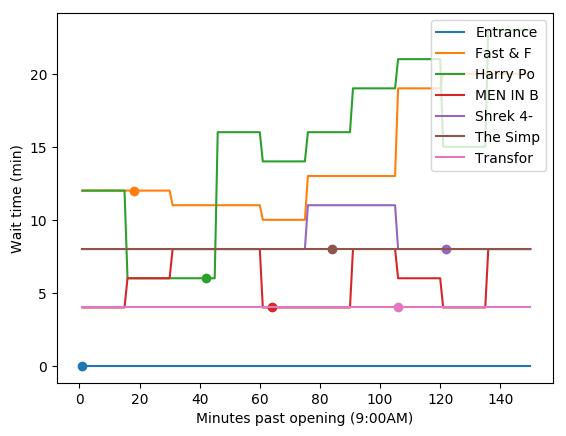

                            Rides ╲  │ Arrival     Walk     Wait
─────────────────────────────────────┼──────────────────────────
"Entrance"                           │  "9:01"        7        0
"Fast & Furious - Supercharged"      │  "9:18"        2       12
"Harry Potter Escape from Gringotts" │  "9:42"        6        6
"MEN IN BLACK Alien Attack"          │ "10:04"        6        4
"The Simpsons Ride"                  │ "10:24"        2       11
"Transformers: The Ride 3D"          │ "10:46"        6        8
"Shrek 4-D"                          │ "11:02"        4        4
Total                                │     "-"     29.0     42.0


PyObject <matplotlib.legend.Legend object at 0x11ebc1090>

In [8]:
# Universal Studios
println("Universal Studios:")
c = import_walk("studios_walk.csv")    # symmetric walk time matrix
w = import_wait("studios_wait.csv", 15)     # temporal wait time matrix (wait time at ride i at minute t)
solution = optimal_theme_park_tour(1, 1, 10, 150, c, w)
print_schedule(solution, readcsv("studios_rides.csv"), c, w, 9, 0)
plot_solution(solution, readcsv("studios_rides.csv"), w, 150)

<img src="Maps/Map4-Both1.png" width="500"> <br/>
In this solution to minimizing walk and wait time, we can see how the order of the rides has changed from the original TSP. The walk time only increased by a minute and the wait times were very low to ride six rides. We were able to achieve a schedule and ordering for the rides that allows you to ride six rides with less than an hour of wait time! The plot above shows the wait time data drawn and the dots represent when we arrive at each ride

2) Islands of Adventure - **61 minutes**

Islands of Adventure:
Academic license - for non-commercial use only
8×3 Named Array{Any,2}


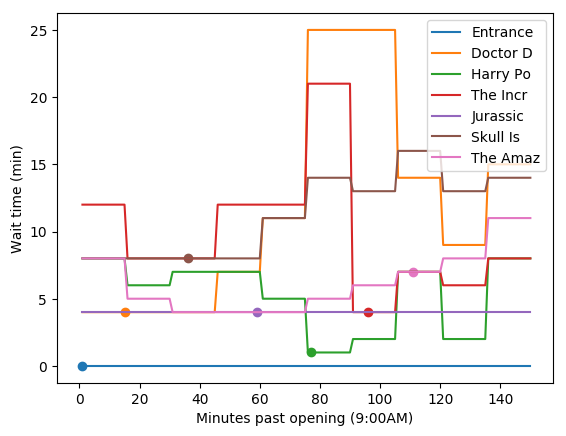

                               Rides ╲  │ Arrival     Walk     Wait
────────────────────────────────────────┼──────────────────────────
"Entrance"                              │  "9:01"        4        0
"Doctor Doom's Fearfall"                │  "9:15"        7        4
"Skull Island: Reign of Kong"           │  "9:36"        4        7
"Jurassic Park River Adventure"         │  "9:59"        8       12
"Harry Potter and the Forddien Journey" │ "10:17"        8        4
"The Incredible Hulk Coaster"           │ "10:36"        7       13
"The Amazing Adventures of Spiderman"   │ "10:51"        4        7
Total                                   │     "-"     33.0     28.0


PyObject <matplotlib.legend.Legend object at 0x126802b50>

In [9]:
# Islands of Adventure
println("Islands of Adventure:")
c = import_walk("ioa_walk.csv")    # symmetric walk time matrix
w = import_wait("ioa_wait.csv", 15)     # temporal wait time matrix (wait time at ride i at minute t)
solution = optimal_theme_park_tour(1, 1, 10, 150, c, w)
print_schedule(solution, readcsv("ioa_rides.csv"), c, w, 9, 0)
plot_solution(solution, readcsv("ioa_rides.csv"), w, 150)

<img src="Maps/Map5-Both2.png" width="500"> <br/>

We see a similar result in this where the order of the rides has shifted accomodate for minimizing wait time. The solution has a fairly similar length path, only increasing the walk time by three minutes. The model decided to change the schedule to pass some rides and return to them later so that it could minimize wait time. This is exactly what we were looking for and expected to model to pass rides and come back to them when it was less busy. We expected this for the Island of Adventures given its more circular nature compared to the studios.

### Analysis of Weighted Objectives (Islands of Adventure): ###

To see how the walk and wait objectives compare, we will run ten different problems with different combinations of inversely related weights. In previous results, we allocated equal weights to wait time and walk time to yield the best possible result. However, our model can accommodate to tourist preferences as well if one wishes to walk more and wait less or wait more and walk less by providing the appropriate weights to $\lambda_{walk}$ and $\lambda_{wait}$.

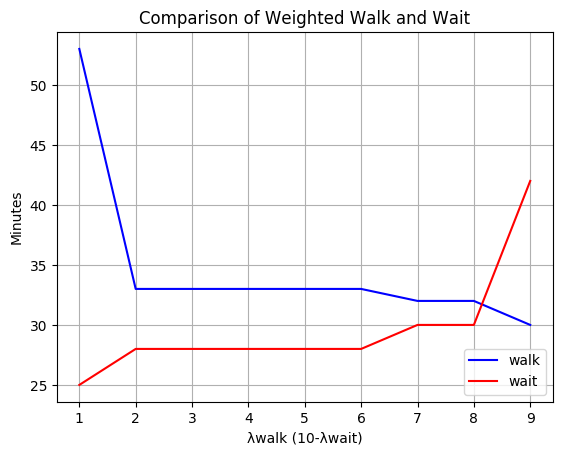

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only


PyObject <matplotlib.legend.Legend object at 0x12721a750>

In [10]:
using PyPlot

c = import_walk("ioa_walk.csv")    # symmetric walk time matrix
w = import_wait("ioa_wait.csv", 15)     # asymmetric temporal wait time matrix (wait time at ride i at minute t)
solutions = []
for λ1 = 1:9
    λ2 = 10 - λ1
    push!(solutions, optimal_theme_park_tour(λ1, λ2, 10, 150, c, w))
end

x = (1:1:9)
y_walk = []
y_wait = []
for i = 1:9
    push!(y_walk, solutions[i][3])
    push!(y_wait, solutions[i][4])
end
plot(x, y_walk, "b-")
plot(x, y_wait, "r-")
xlabel("λwalk (10-λwait)")
ylabel("Minutes")
title("Comparison of Weighted Walk and Wait")
grid()
legend(["walk", "wait"], loc="lower right")

The results from this data show how walk and wait time compare with differnt weights on their objective quantities. The model that considers wait and walk takes weights for each objective quantity. The variables $\lambda_{walk}$ and $\lambda_{wait}$ are the weights for those walk and wait quantities where $\lambda_{wait} = 10 - \lambda_{walk}$. The wait time stays lower than the walk time for $\lambda_{walk} \ge 1$. This shows how that even though the walk times are weighted heavier in the objective, the model tries to minimize the wait time more because it has a bigger effect on the total time waiting and walking.

### Data Smoothing (L2 regularization): ###

Although our predcitive is fairly accurate for the 15 minute intervals, the rate at which the wait times change is not instantaneous. We will use 2-norm regularization to smooth the data and see if we get different results.

In [11]:
using JuMP, Gurobi, PyPlot
# 2-norm regularization
function smooth(w, λ, ints)
    (r,T) = size(w)
    w_smooth = []
    for k in 1:r
        w_row = w[k,:]
        m = Model(solver=GurobiSolver(OutputFlag=0))
        @variable(m, y[1:T])
        @objective(m, Min, sum((w_row[i] - y[i])^2 for i in 1:T) + λ * sum((y[i + 1] - y[i])^2 for i in 1:T-1))
        solve(m)
        w_smooth = [w_smooth ; transpose(getvalue(y))]
    end
    if (ints)
        for i in 1:r
            for j in 1:T
                w_smooth[i,j] = round(w_smooth[i,j], 0)
            end
        end
    end
    return w_smooth
end

smooth (generic function with 1 method)

Universal Studios w/ Smoothed Data:
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
8×3 Named Array{Any,2}


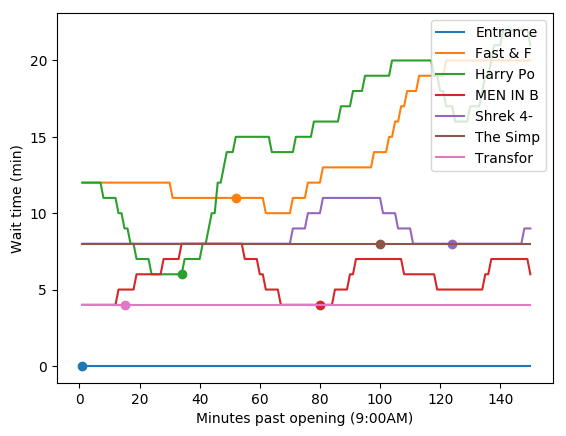

                            Rides ╲  │ Arrival     Walk     Wait
─────────────────────────────────────┼──────────────────────────
"Entrance"                           │  "9:01"        4      0.0
"Transformers: The Ride 3D"          │  "9:15"        2     12.0
"Harry Potter Escape from Gringotts" │  "9:34"        2      6.0
"Fast & Furious - Supercharged"      │  "9:52"        0      8.0
"MEN IN BLACK Alien Attack"          │ "10:20"        6     10.0
"The Simpsons Ride"                  │ "10:40"        6      8.0
"Shrek 4-D"                          │ "11:04"        4      4.0
Total                                │     "-"     32.0     41.0


PyObject <matplotlib.legend.Legend object at 0x1268275d0>

In [12]:
# Universal Studios
println("Universal Studios w/ Smoothed Data:")
c = import_walk("studios_walk.csv")    # symmetric walk time matrix
w = import_wait("studios_wait.csv", 15)     # temporal wait time matrix (wait time at ride i at minute t)
w_smooth = smooth(w, 20, true)
solution = optimal_theme_park_tour(1, 1, 10, 150, c, w_smooth)
print_schedule(solution, readcsv("studios_rides.csv"), c, w_smooth, 9, 0)
plot_solution(solution, readcsv("studios_rides.csv"), w_smooth, 150)

Islands of Adventure w/ Smoothed Data:
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
8×3 Named Array{Any,2}


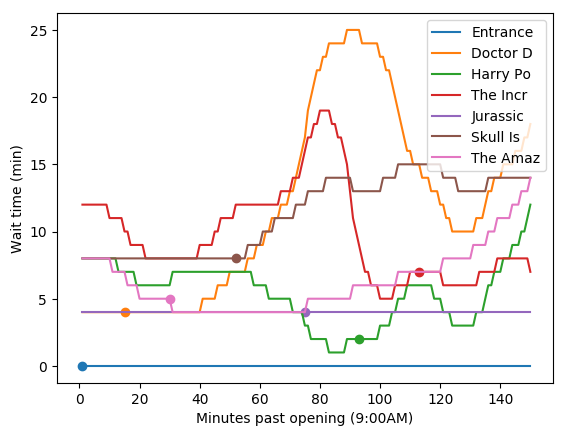

                               Rides ╲  │ Arrival     Walk     Wait
────────────────────────────────────────┼──────────────────────────
"Entrance"                              │  "9:01"        4      0.0
"Doctor Doom's Fearfall"                │  "9:15"        1      4.0
"The Amazing Adventures of Spiderman"   │  "9:30"        7      6.0
"Skull Island: Reign of Kong"           │  "9:52"        8     12.0
"Jurassic Park River Adventure"         │ "10:15"        4      4.0
"Harry Potter and the Forddien Journey" │ "10:33"        8     13.0
"The Incredible Hulk Coaster"           │ "10:53"        4      7.0
Total                                   │     "-"     32.0     30.0


PyObject <matplotlib.legend.Legend object at 0x1269a8a50>

In [13]:
# Islands of Adventure
println("Islands of Adventure w/ Smoothed Data:")
c = import_walk("ioa_walk.csv")    # symmetric walk time matrix
w = import_wait("ioa_wait.csv", 15)     # temporal wait time matrix (wait time at ride i at minute t)
w_smooth = smooth(w, 20, true)
solution = optimal_theme_park_tour(1, 1, 10, 150, c, w_smooth)
print_schedule(solution, readcsv("ioa_rides.csv"), c, w_smooth, 9, 0)
plot_solution(solution, readcsv("ioa_rides.csv"), w_smooth, 150)

The order of the rides in both of these models has changed from the original data. This data is probably more accurate since it doesn't have instantaneous changes in ride wait times. Another interesting quality of this data is that the objective quantity has been determined to be rather the same as the the objective quantity determined in the original data. We have achieved a better optimal time for the Universal Studios park and have a worse (and possibly more realistic) optimal wait time by two minutes for the Islands of Adventure park. The regularization parameter of the 2-norm problem could be experimented with over a period of days at the park to determine which smoothing parameter best predicts the data. This would be best because the accuracy and meaning to our solution is entirely dependent on our predictive data.

## 5. Conclusion ##

Based on our results, we can easily conclude that we can add even add a temporal constraints to the Traveling Salesman Problem model to further optimize or tune results for more practical outputs. As such, if further expanded upon, this problem can be used to create more effective solutions for real-life applications such as traffic predictions with wait-times at traffic signals, supply chain of goods and services or even for other parks such as Disney World. It is also important to note that the Traveling Salesman Problem is a NP-Hard problem, i.e, the computation time would increase rapidly with increase in the number of rides and duration of stay at the park.

Furthermore, if such a model were deployed to a large scale use, this would attract most tourists to go to the specific ride at a certain time of day. Due to this large influx to a particular ride, it would lead to strong bias in the model as the real wait-times for the ride would change. However, the model does not receive data dynamically but relies on the past data to yield results. This issue can be addressed in mainly in two ways. First, by creating a new data pipeline that would feed wait time data dynamically to the model at fixed interval of time. Second, by developing an intelligent way to manage the flow of tourist inside the park by using simple methods like round robin or even advanced methods like machine learning to predicate the changes in the wait time as tourist goes to a particular ride and predict future order of rides accordingly.

Other fun alternatives to this problem could be adding the extra constraint of maximizing fun. For example, if there are too many rides and too little time, one could find the perfect ratio of minimum time spent at the park with the best rides (based on customer reviews or a 'thrill-meter'). We could also compare our results to wait time data as a result of purchasing a 'Fast Pass' to gain entry to expedited lines. Visitors using a multi-park pass could use our model to see if it is optimal to complete each park individually, or to cross between parks to take advantage of wait time lows. It would also be interesting to see which park it would choose to visit first. We must remember when getting these results though that our solution is only as good as the predictable accuracy of our data.